<a href="https://colab.research.google.com/github/Yalenigomez/WALMART/blob/main/Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
#================
# IMPORT LIBRERIAS
#================
import pandas as pd
import pandas_datareader as reader #libreria python para tomar datos financieros como dataframe
from datetime import date, datetime, timedelta
from pandas.io import gbq
!python --version
import numpy as np
import calendar
import locale


import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
import seaborn as sns #pip install seaborn

import plotly.graph_objects as go
from sklearn.ensemble import RandomForestRegressor
from collections import Counter
import altair as alt
import plotly.express as px
import xlrd

#from google.colab import data_table
#data_table.enable_dataframe_formatter()

Python 3.7.12


In [114]:
#!pip install pycountry
#extraer datos de github dataframe con el metodo curl desde una web con los precios de petroleo
!curl https://raw.githubusercontent.com/walmartdigital/de-challenge/main/data/result.csv -o ../result.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  732k  100  732k    0     0  2807k      0 --:--:-- --:--:-- --:--:-- 2807k


In [115]:
#=============
# CARGA DE  DATOS 
#=============

#url1 = 'https://raw.githubusercontent.com/walmartdigital/de-challenge/main/data/result.csv'
#url1 = 'https://raw.githubusercontent.com/walmartdigital/de-challenge/main/data/result.csv'
#DF_Result = pd.read_csv(url1)

DF_Result = pd.read_csv('../result.csv')

In [116]:
DF_Result=pd.DataFrame(DF_Result)

In [117]:
DF_Result.head(3)

,metascore,name,console,userscore,date
0,97,Grand Theft Auto V,PS3,8.3,"Sep 17, 2013"
1,97,Grand Theft Auto V,X360,8.3,"Sep 17, 2013"
2,95,The Last of Us,PS3,9.2,"Jun 14, 2013"


Se muestra los 3 primeros registros del DataFrame 

In [118]:
#ver nombre de las columnas
nombre_columnas = list(DF_Result.columns)
nombre_columnas

['metascore', 'name', 'console', 'userscore', 'date']

In [119]:
#---------------
#RENOMBRAR COLUMNAS en especial el nombre de colomna date, dado que esta es una palabra reservada.
#---------------
DF_Resultado= DF_Result.rename(
        columns = {'metascore':'METASCORE'
                   ,'name':'NOMBRE'
                   ,'console':'CONSOLA'
                   ,'userscore':'USERCORE'
                   ,'date':'FECHA'
                   }
        )

Revisión de fecha y modificación de esta.
Creación de 2 campos PERIODO ANUAL Y PERIODO MENSUAL

In [120]:
# REVISION DE LA FECHA DATES
#*** Resultado ***
(DF_Resultado
    .filter(['FECHA']).head(10)
)

,FECHA
0,"Sep 17, 2013"
1,"Sep 17, 2013"
2,"Jun 14, 2013"
3,"Mar 26, 2013"
4,"Mar 25, 2013"
5,"Mar 26, 2013"
6,"Nov 22, 2013"
7,"Feb 4, 2013"
8,"Sep 3, 2013"
9,"May 1, 2013"


In [121]:
#Modificación  formato  campo fecha
DF_Resultado['FECHA'] = DF_Resultado['FECHA'].apply(lambda _: datetime.strptime(_,"%b %d, %Y"))
DF_Resultado.head


<bound method NDFrame.head of        METASCORE                         NOMBRE CONSOLA USERCORE      FECHA
0             97             Grand Theft Auto V     PS3      8.3 2013-09-17
1             97             Grand Theft Auto V    X360      8.3 2013-09-17
2             95                 The Last of Us     PS3      9.2 2013-06-14
3             94              BioShock Infinite     PS3      8.5 2013-03-26
4             94              BioShock Infinite      PC      8.6 2013-03-25
...          ...                            ...     ...      ...        ...
15642         38  Touhou Kobuto V: Burst Battle  Switch      4.6 2017-10-10
15643         38                        Randall     PS4      2.1 2017-06-06
15644         36             Tokyo Tattoo Girls    VITA      5.4 2017-11-14
15645         26                      Road Rage     PS4      2.5 2017-11-14
15646         17         Vroom in the Night Sky  Switch      3.1 2017-04-05

[15647 rows x 5 columns]>

In [122]:
#Creaación de campos de fecha "PERIODO ANUAL Y MENSUAL"
DF_Resultado['PERIODO_ANUAL'] = DF_Resultado['FECHA'].dt.year 
DF_Resultado['PERIODO_MENSUAL'] = DF_Resultado['FECHA'].dt.month
DF_Resultado.head(5)


#DF_Resultado.insert(5, 'PERIODO', "") 

,METASCORE,NOMBRE,CONSOLA,USERCORE,FECHA,PERIODO_ANUAL,PERIODO_MENSUAL
0,97,Grand Theft Auto V,PS3,8.3,2013-09-17,2013,9
1,97,Grand Theft Auto V,X360,8.3,2013-09-17,2013,9
2,95,The Last of Us,PS3,9.2,2013-06-14,2013,6
3,94,BioShock Infinite,PS3,8.5,2013-03-26,2013,3
4,94,BioShock Infinite,PC,8.6,2013-03-25,2013,3


In [123]:
print(DF_Resultado)

       METASCORE                         NOMBRE  ... PERIODO_ANUAL PERIODO_MENSUAL
0             97             Grand Theft Auto V  ...          2013               9
1             97             Grand Theft Auto V  ...          2013               9
2             95                 The Last of Us  ...          2013               6
3             94              BioShock Infinite  ...          2013               3
4             94              BioShock Infinite  ...          2013               3
...          ...                            ...  ...           ...             ...
15642         38  Touhou Kobuto V: Burst Battle  ...          2017              10
15643         38                        Randall  ...          2017               6
15644         36             Tokyo Tattoo Girls  ...          2017              11
15645         26                      Road Rage  ...          2017              11
15646         17         Vroom in the Night Sky  ...          2017               4

[15

****LIMPIEZA DE ARCHIVO *****

In [124]:
#Dejando solo los valores unicos, para que no se repitan
DF_Resultado['CONSOLA'].unique()

array(['PS3', 'X360', 'PC', 'WIIU', '3DS', 'PS4', 'VITA', 'XONE',
       'Switch', 'WII', 'DS', 'PSP', 'PS2', 'XBOX', 'GBA', 'N64', 'DC',
       'GC', 'PS', ' PC', ' VITA'], dtype=object)

In [125]:
#Quitar espacios en blanco una columna 
#En el campo CONSOLA se encuentra un nombre PC aparece 2 veces, por lo que se procesde a quitar espacios en blanco

DF_Resultado['CONSOLA'] = DF_Resultado['CONSOLA'].str.strip()


In [126]:
#Se despliega la información de CONSOLA de forma más especifica "PC"
DF_Resultado[DF_Resultado['CONSOLA']=='PC'][:10]

,METASCORE,NOMBRE,CONSOLA,USERCORE,FECHA,PERIODO_ANUAL,PERIODO_MENSUAL
4,94,BioShock Infinite,PC,8.6,2013-03-25,2013,3
9,91,Fez,PC,6.7,2013-05-01,2013,5
13,90,Spelunky,PC,7.3,2013-08-08,2013,8
15,90,Brothers: A Tale of Two Sons,PC,8.6,2013-09-03,2013,9
16,90,Dota 2,PC,6.5,2013-07-09,2013,7
19,89,Rocksmith 2014 Edition,PC,7.9,2013-10-22,2013,10
22,88,Crusader Kings II: The Old Gods,PC,8.7,2013-05-28,2013,5
28,88,The Stanley Parable,PC,8,2013-10-17,2013,10
29,88,Guacamelee! Gold Edition,PC,7.3,2013-08-08,2013,8
34,87,The Swapper,PC,8.7,2013-05-30,2013,5


In [127]:
#RECUENTO
len (DF_Resultado)

15647

In [128]:
#Tipo de datos
DF_Resultado.dtypes

DF_Resultado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15647 entries, 0 to 15646
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   METASCORE        15647 non-null  int64         
 1   NOMBRE           15647 non-null  object        
 2   CONSOLA          15647 non-null  object        
 3   USERCORE         15647 non-null  object        
 4   FECHA            15647 non-null  datetime64[ns]
 5   PERIODO_ANUAL    15647 non-null  int64         
 6   PERIODO_MENSUAL  15647 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 855.8+ KB


In [129]:
DF_Resultado.reset_index(inplace=True)
#type(DF_Resultado.index[0])
#DF_Resultado=DF_Resultado.set_index('FECHA')


In [130]:
DF_Resultado.tail()

,index,METASCORE,NOMBRE,CONSOLA,USERCORE,FECHA,PERIODO_ANUAL,PERIODO_MENSUAL
15642,15642,38,Touhou Kobuto V: Burst Battle,Switch,4.6,2017-10-10,2017,10
15643,15643,38,Randall,PS4,2.1,2017-06-06,2017,6
15644,15644,36,Tokyo Tattoo Girls,VITA,5.4,2017-11-14,2017,11
15645,15645,26,Road Rage,PS4,2.5,2017-11-14,2017,11
15646,15646,17,Vroom in the Night Sky,Switch,3.1,2017-04-05,2017,4


In [131]:
#shape
print(DF_Resultado.shape)

#Tamaño del DataFrame
DF_Resultado.size

(15647, 8)


125176

In [132]:
#Dejando solo los valores unicos, para que no se repitan
DF_Resultado['CONSOLA'].unique()

array(['PS3', 'X360', 'PC', 'WIIU', '3DS', 'PS4', 'VITA', 'XONE',
       'Switch', 'WII', 'DS', 'PSP', 'PS2', 'XBOX', 'GBA', 'N64', 'DC',
       'GC', 'PS'], dtype=object)

In [133]:
DF_Resultado['NOMBRE'].unique()

array(['Grand Theft Auto V', 'The Last of Us', 'BioShock Infinite', ...,
       'Tokyo Tattoo Girls', 'Road Rage', 'Vroom in the Night Sky'],
      dtype=object)

In [134]:
DF_Resultado['PERIODO_ANUAL'].unique()

array([2013, 2014, 2018, 2011, 2016, 2017, 2012, 2015, 2010, 2009, 2001,
       2006, 2007, 2008, 2000, 2004, 2003, 2005, 2002])

In [135]:
DF_Resultado['PERIODO_MENSUAL'].unique()

array([ 9,  6,  3, 11,  2,  5,  8,  7, 10,  4,  1, 12])

In [136]:
DF_Resultado['METASCORE'].unique()

array([97, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 98, 96, 82,
       81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65,
       64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48,
       47, 46, 44, 43, 42, 41, 40, 39, 38, 37, 28, 26, 45, 35, 34, 33, 32,
       36, 30, 27, 23, 22, 19, 17, 16, 31, 29, 25, 24, 20, 11, 21, 18])

In [137]:
DF_Resultado['USERCORE'].unique()

array(['8.3', '9.2', '8.5', '8.6', '8.9', '9.1', '8.7', '6.7', '9', '7.2',
       '7.3', '6.5', '8.2', '6.1', '7.9', '5.8', '7.6', '8', '7.5', '8.4',
       '6.3', '7.4', '6.4', '8.8', '4.9', '5.4', '5.7', '7.7', '7.8',
       '5.1', '4.3', '6.6', '8.1', '7', '7.1', '6.8', '5.6', '5', '5.9',
       '6.9', '4.2', '6.2', '4.8', '6', '4.7', '5.2', '5.5', '3.4', '3.2',
       '9.3', '4.5', '4.1', '1.5', '4.4', '3.1', '4.6', '9.4', 'tbd',
       '5.3', '3.6', '2.1', '1.9', '2.8', '2.4', '3.3', '3', '3.5', '3.8',
       '3.7', '4', '2.7', '1.6', '2.6', '3.9', '2.5', '0.8', '1.7', '1.4',
       '2.9', '1.8', '2.2', '2.3', '2', '0.7', '1.3', '1', '1.2', '1.1',
       '0.2', '0.9', '0.4', '0.5'], dtype=object)

In [138]:
DF_Resultado[DF_Resultado['USERCORE']=='tbd'][0:10]

,index,METASCORE,NOMBRE,CONSOLA,USERCORE,FECHA,PERIODO_ANUAL,PERIODO_MENSUAL
1090,1090,85,Dave Mirra Freestyle BMX 2,GBA,tbd,2001-11-25,2001,11
1526,1526,90,Madden NFL 2005,GC,tbd,2004-08-09,2004,8
1542,1542,88,Tiger Woods PGA Tour 2005,GC,tbd,2004-09-20,2004,9
1551,1551,86,NASCAR 2005: Chase for the Cup,XBOX,tbd,2004-08-31,2004,8
1580,1580,84,Pinball FX 2: Marvel Pinball - Vengeance and V...,X360,tbd,2011-12-13,2011,12
1713,1713,81,The 2D Adventures of Rotating Octopus Character,PSP,tbd,2011-06-02,2011,6
2098,2098,80,EA Sports Active More Workouts,WII,tbd,2009-11-17,2009,11
2287,2287,81,Lumines Remastered,XONE,tbd,2018-06-26,2018,6
2370,2370,87,NFL 2K2,XBOX,tbd,2002-01-09,2002,1
2383,2383,86,Moto Racer Advance,GBA,tbd,2002-12-05,2002,12


In [139]:
# reemplazar las cadenas coincidentes 
DF_Resultado['USERCORE'] = DF_Resultado['USERCORE'].replace('tbd', 0)
DF_Resultado.isnull().sum()                         

index              0
METASCORE          0
NOMBRE             0
CONSOLA            0
USERCORE           0
FECHA              0
PERIODO_ANUAL      0
PERIODO_MENSUAL    0
dtype: int64

In [140]:
#Se revisa si los cambios "tbd" feron realizados
DF_Resultado[DF_Resultado['USERCORE']==0][0:10]

,index,METASCORE,NOMBRE,CONSOLA,USERCORE,FECHA,PERIODO_ANUAL,PERIODO_MENSUAL
1090,1090,85,Dave Mirra Freestyle BMX 2,GBA,0,2001-11-25,2001,11
1526,1526,90,Madden NFL 2005,GC,0,2004-08-09,2004,8
1542,1542,88,Tiger Woods PGA Tour 2005,GC,0,2004-09-20,2004,9
1551,1551,86,NASCAR 2005: Chase for the Cup,XBOX,0,2004-08-31,2004,8
1580,1580,84,Pinball FX 2: Marvel Pinball - Vengeance and V...,X360,0,2011-12-13,2011,12
1713,1713,81,The 2D Adventures of Rotating Octopus Character,PSP,0,2011-06-02,2011,6
2098,2098,80,EA Sports Active More Workouts,WII,0,2009-11-17,2009,11
2287,2287,81,Lumines Remastered,XONE,0,2018-06-26,2018,6
2370,2370,87,NFL 2K2,XBOX,0,2002-01-09,2002,1
2383,2383,86,Moto Racer Advance,GBA,0,2002-12-05,2002,12


In [141]:
#Modificación de tipo de dato de string a float
DF_Resultado['USERCORE']=DF_Resultado['USERCORE'].astype(float)
DF_Resultado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15647 entries, 0 to 15646
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   index            15647 non-null  int64         
 1   METASCORE        15647 non-null  int64         
 2   NOMBRE           15647 non-null  object        
 3   CONSOLA          15647 non-null  object        
 4   USERCORE         15647 non-null  float64       
 5   FECHA            15647 non-null  datetime64[ns]
 6   PERIODO_ANUAL    15647 non-null  int64         
 7   PERIODO_MENSUAL  15647 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 978.1+ KB


In [142]:
## Revisamos duplicados
DF_Resultado.duplicated().sum()


0

In [143]:
DF_Resultado.describe() #Se obtiene la mediana, le minimo maximo

,index,METASCORE,USERCORE,PERIODO_ANUAL,PERIODO_MENSUAL
count,15647.000000,15647.000000,15647.000000,15647.000000,15647.000000
mean,7823.000000,70.012207,6.411958,2009.632901,7.022944
std,4517.044166,12.633671,2.375554,5.249650,3.335656
min,0.000000,11.000000,0.000000,2000.000000,1.000000
25%,3911.500000,63.000000,6.000000,2005.000000,4.000000
50%,7823.000000,72.000000,7.200000,2010.000000,8.000000
75%,11734.500000,79.000000,7.900000,2014.000000,10.000000
max,15646.000000,98.000000,9.400000,2018.000000,12.000000


In [144]:
DF_Resultado.nlargest(10,'METASCORE')['CONSOLA']



200       XONE
1300       PS3
1301      X360
1400        PS
0          PS3
1         X360
56        XONE
67         PS4
201        PS4
321     Switch
Name: CONSOLA, dtype: object

In [145]:
#Se agrupa por CONSOLA donde se evalua la cantidad de puntuación "USERCORE"
DF_Resultado.groupby("NOMBRE").count()["USERCORE"].sort_values(ascending = False)

NOMBRE
Cars                                         9
Madden NFL 07                                9
Madden NFL 06                                8
The Sims 2                                   7
Harry Potter and the Order of the Phoenix    7
                                            ..
PictoImage                                   1
Pikmin                                       1
Pikmin 2                                     1
Pikmin 3                                     1
#IDARB                                       1
Name: USERCORE, Length: 10451, dtype: int64

In [146]:

DF_Resultado.sort_values('NOMBRE', ascending=False).head(10)

,index,METASCORE,NOMBRE,CONSOLA,USERCORE,FECHA,PERIODO_ANUAL,PERIODO_MENSUAL
15528,15528,50,xXx,GBA,5.0,2002-07-31,2002,7
8292,8292,71,uDraw Studio,WII,0.0,2010-11-14,2010,11
14270,14270,64,theHunter: Call of the Wild,PC,7.5,2017-02-16,2017,2
6858,6858,72,rain,PS3,7.9,2013-10-01,2013,10
8618,8618,70,oOo: Ascension,XONE,8.0,2018-05-25,2018,5
10108,10108,66,nail'd,PS3,6.2,2010-11-30,2010,11
10149,10149,64,nail'd,X360,7.1,2010-11-30,2010,11
8348,8348,69,nail'd,PC,7.7,2010-11-30,2010,11
10142,10142,64,lilt line,WII,8.4,2010-12-13,2010,12
7578,7578,75,kill.switch,XBOX,8.0,2003-10-28,2003,10


In [147]:
#Los 10 mejores juegos para cada consola / empresa.
#Los 10 peores juegos para cada consola / empresa.


DF_GRUPO=DF_Resultado.groupby(['CONSOLA','NOMBRE'])['METASCORE'].apply(lambda x: ','.join(str(e) for e in x))

print(DF_GRUPO )

#DF_GRUPO.to_csv("DF_GRUPO.csv", index=False)
#DF_GRUPO.to_excel('DF_GRUPO.xlsx', index=False)

CONSOLA  NOMBRE                        
3DS      3D After Burner II                81
         3D Classics: Kid Icarus           77
         3D Classics: Kirby's Adventure    77
         3D Classics: TwinBee              68
         3D Classics: Urban Champion       37
                                           ..
XONE     Zombie Army Trilogy               62
         Zoo Tycoon                        68
         de Blob 2                         76
         iO                                68
         oOo: Ascension                    70
Name: METASCORE, Length: 15646, dtype: object


In [148]:
DF_GRUPO=DF_Resultado.groupby(['CONSOLA','NOMBRE'])['USERCORE'].apply(lambda x: ','.join(str(e) for e in x))

print(DF_GRUPO )

CONSOLA  NOMBRE                        
3DS      3D After Burner II                8.2
         3D Classics: Kid Icarus           7.3
         3D Classics: Kirby's Adventure    7.9
         3D Classics: TwinBee              7.5
         3D Classics: Urban Champion       5.8
                                          ... 
XONE     Zombie Army Trilogy               6.9
         Zoo Tycoon                        3.1
         de Blob 2                         7.3
         iO                                0.0
         oOo: Ascension                    8.0
Name: USERCORE, Length: 15646, dtype: object


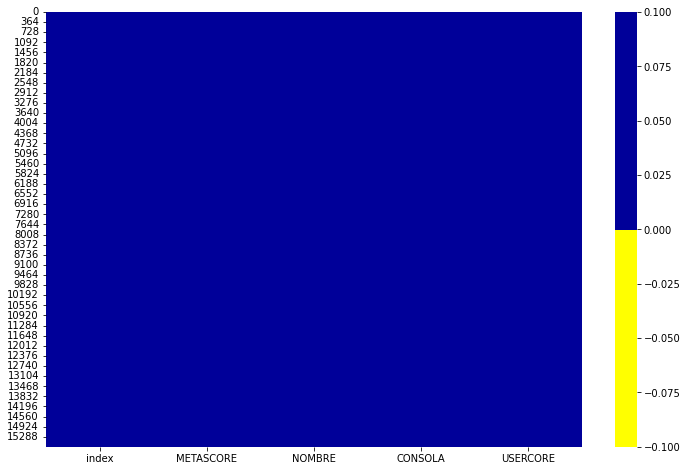

In [149]:
#TECNICA 1 PARA CONOCER LOS MISSING - DATA HEATMAP
matplotlib.rcParams['figure.figsize'] = (12,8) #Tamaño del grafico
cols = DF_Resultado.columns[:5] #seleccion de columnas
colours = ['#ffff00','#000099' ]
sns.heatmap(DF_Resultado[cols].isnull(), cmap=sns.color_palette(colours))

In [150]:
#tecnica 2 missing con porcentaje
for col in DF_Resultado.columns:
    pct_missing = np.mean(DF_Resultado[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

index - 0%
METASCORE - 0%
NOMBRE - 0%
CONSOLA - 0%
USERCORE - 0%
FECHA - 0%
PERIODO_ANUAL - 0%
PERIODO_MENSUAL - 0%


In [151]:
#Los 10 mejores juegos para todas las consolas filtrado por "METASCORE"
top_10 = DF_Resultado[['NOMBRE','CONSOLA','METASCORE','FECHA']].sort_values('METASCORE', ascending=False)[0:10]
print("Los 10 mejores juegos para todas las consolas")
top_10

Los 10 mejores juegos para todas las consolas


,NOMBRE,CONSOLA,METASCORE,FECHA
1301,Grand Theft Auto IV,X360,98,2008-04-29
200,Red Dead Redemption 2,XONE,98,2018-10-26
1400,Tony Hawk's Pro Skater 2,PS,98,2000-09-20
1300,Grand Theft Auto IV,PS3,98,2008-04-29
0,Grand Theft Auto V,PS3,97,2013-09-17
201,Red Dead Redemption 2,PS4,97,2018-10-26
2300,Metroid Prime,GC,97,2002-11-17
321,The Legend of Zelda: Breath of the Wild,Switch,97,2017-03-03
743,Super Mario Galaxy 2,WII,97,2010-05-23
356,Super Mario Odyssey,Switch,97,2017-10-27


In [152]:
#Los 10 peores juegos para todas las consolas.
top_10 = DF_Resultado[['NOMBRE','CONSOLA','METASCORE','FECHA']].sort_values('METASCORE', ascending=True)[0:10]
print("Los 10 peores juegos para todas las consolas")
top_10

Los 10 peores juegos para todas las consolas


,NOMBRE,CONSOLA,METASCORE,FECHA
12836,Family Party: 30 Great Games Obstacle Arcade,WIIU,11,2012-12-04
12641,Ride to Hell: Retribution,PC,16,2013-06-24
15646,Vroom in the Night Sky,Switch,17,2017-04-05
12640,Double Dragon II: Wander of the Dragons,X360,17,2013-04-05
15411,Leisure Suit Larry: Box Office Bust,PS3,17,2009-05-05
15445,Yaris,X360,17,2007-10-10
15241,SPOGS Racing,WII,18,2008-07-07
12639,Ride to Hell: Retribution,X360,19,2013-06-25
14083,Alone in the Dark: Illumination,PC,19,2015-06-11
15410,Leisure Suit Larry: Box Office Bust,PC,20,2009-03-31


#Los 10 mejores y peores por video juegos por consola

In [105]:
def print_RankingConsola(tmpValue):
  df_Mejores= pd.DataFrame()
  df_Peores = pd.DataFrame()
  
  df_Mejores=DF_Resultado[DF_Resultado['CONSOLA'] == tmpValue].sort_values('METASCORE',ascending=False).head(10)
  df_Peores=DF_Resultado[DF_Resultado['CONSOLA'] == tmpValue].sort_values('METASCORE',ascending=True).head(10)
  df_Mejores= df_Mejores[['CONSOLA','NOMBRE','METASCORE']]
  df_Peores= df_Peores[['CONSOLA','NOMBRE','METASCORE']]

  print("Los 10 mejores de: "+tmpValue)
  print(df_Mejores)
  print("-----------------------------------------------------------------------")  

  print("Los 10 peores de: "+tmpValue)
  print(df_Peores)
  print("-----------------------------------------------------------------------") 
  print("")  

DF_Resultado['CONSOLA'] = DF_Resultado['CONSOLA'].str.strip()
tmpConsole = DF_Resultado['CONSOLA'].unique().tolist()
for tmpValue in tmpConsole:
  print_RankingConsola(tmpValue)
  
def print_RankingConsola(tmpValue):
  df_Mejores= pd.DataFrame()
  df_Peores = pd.DataFrame()
  
  df_Mejores=DF_Resultado[DF_Resultado['CONSOLA'] == tmpValue].sort_values('METASCORE',ascending=False).head(10)
  df_Peores=DF_Resultado[DF_Resultado['CONSOLA'] == tmpValue].sort_values('METASCORE',ascending=True).head(10)
  df_Mejores= df_Mejores[['CONSOLA','NOMBRE','METASCORE']].sort_values('METASCORE',ascending=False)
  df_Peores= df_Peores[['CONSOLA','NOMBRE','METASCORE']].sort_values('METASCORE',ascending=False)

  print("Los 10 mejores de: "+tmpValue)
  print(df_Mejores)
  print("-----------------------------------------------------------------------")  

  print("Los 10 peores de: "+tmpValue)
  print(df_Peores)
  print("-----------------------------------------------------------------------") 
  print("")  

DF_Resultado['CONSOLA'] = DF_Resultado['CONSOLA'].str.strip()
tmpConsole = DF_Resultado['CONSOLA'].unique().tolist()
for tmpValue in tmpConsole:
  print_RankingConsola(tmpValue)
  

Los 10 mejores de: PS3
     CONSOLA                      NOMBRE  METASCORE
1300     PS3         Grand Theft Auto IV         98
0        PS3          Grand Theft Auto V         97
238      PS3         Batman: Arkham City         96
878      PS3  Uncharted 2: Among Thieves         96
2        PS3              The Last of Us         95
767      PS3         Red Dead Redemption         95
252      PS3                    Portal 2         95
1302     PS3             LittleBigPlanet         95
891      PS3           Street Fighter IV         94
3        PS3           BioShock Infinite         94
-----------------------------------------------------------------------
Los 10 peores de: PS3
      CONSOLA                               NOMBRE  METASCORE
15411     PS3  Leisure Suit Larry: Box Office Bust         17
11277     PS3                Rambo: The Video Game         23
15409     PS3                        NBA Unrivaled         24
15405     PS3                        Rogue Warrior         27
1

Grafica con mejor puntuación

Text(0.5, 0, 'PUNTUACION. CONSOLA.')

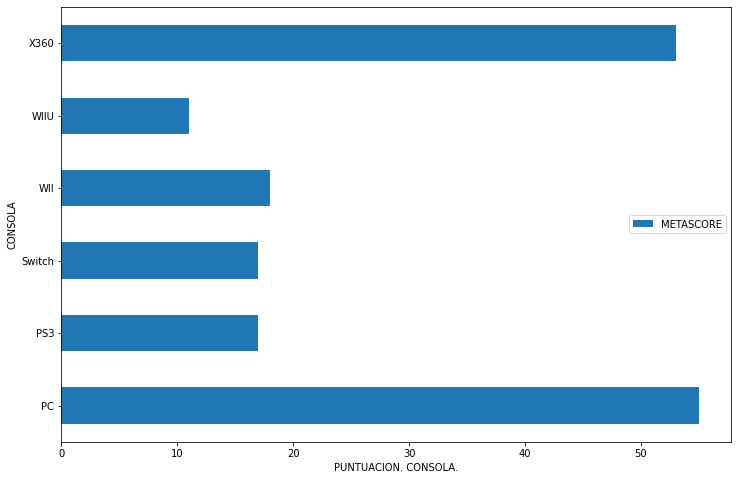

In [109]:
top_10.groupby('CONSOLA')['METASCORE'].sum().plot(kind='barh',legend='Reverse')
plt.xlabel('')
plt.xlabel('PUNTUACION. CONSOLA.')

In [155]:
Videos=DF_Resultado[["NOMBRE","CONSOLA","METASCORE","PERIODO_ANUAL"]]
print(Videos[Videos.METASCORE >=80])

                                   NOMBRE CONSOLA  METASCORE  PERIODO_ANUAL
0                      Grand Theft Auto V     PS3         97           2013
1                      Grand Theft Auto V    X360         97           2013
2                          The Last of Us     PS3         95           2013
3                       BioShock Infinite     PS3         94           2013
4                       BioShock Infinite      PC         94           2013
...                                   ...     ...        ...            ...
5799  Soldier of Fortune II: Double Helix      PC         80           2002
7354             World Rally Championship     PS2         80           2002
7355                     Baseball Advance     GBA         80           2002
7356                     Sega Soccer Slam    XBOX         80           2002
7357   World of Outlaws: Sprint Cars 2002     PS2         80           2002

[3774 rows x 4 columns]


In [156]:
print(Videos[(Videos.CONSOLA.isin(['PS3', 'X360', 'PC', 'WIIU', '3DS', 'PS4', 'VITA', 'XONE',
       'Switch', 'WII', 'DS', 'PSP', 'PS2', 'XBOX', 'GBA', 'N64', 'DC',
       'GC', 'PS']))].sort_values('METASCORE', ascending=False).max())



NOMBRE            xXx
CONSOLA          XONE
METASCORE          98
PERIODO_ANUAL    2018
dtype: object


In [157]:
print(Videos[(Videos.CONSOLA.isin(['PS3', 'X360', 'PC', 'WIIU', '3DS', 'PS4', 'VITA', 'XONE',
       'Switch', 'WII', 'DS', 'PSP', 'PS2', 'XBOX', 'GBA', 'N64', 'DC',
       'GC', 'PS']))].sort_values('METASCORE', ascending=False).min())

NOMBRE           #IDARB
CONSOLA             3DS
METASCORE            11
PERIODO_ANUAL      2000
dtype: object


In [158]:
#a anexa datos
#Descarga de archivos
Videos.to_excel("data_Video.xlsx", index=False)


In [159]:
# top_10
DF = DF_Resultado.sort_values('CONSOLA')
DF

,index,METASCORE,NOMBRE,CONSOLA,USERCORE,FECHA,PERIODO_ANUAL,PERIODO_MENSUAL
6208,6208,72,Mighty Gunvolt,3DS,6.9,2014-08-29,2014,8
305,305,90,Pushmo,3DS,8.3,2011-12-08,2011,12
13336,13336,49,Bust-A-Move Universe,3DS,4.8,2011-03-27,2011,3
303,303,90,Super Mario 3D Land,3DS,8.4,2011-11-13,2011,11
10719,10719,69,Final Fantasy Explorers,3DS,8.4,2016-01-26,2016,1
...,...,...,...,...,...,...,...,...
5657,5657,76,Capcom Beat 'Em Up Bundle,XONE,0.0,2018-09-18,2018,9
3689,3689,79,Steredenn,XONE,6.1,2016-04-01,2016,4
3690,3690,79,Shantae and the Pirate's Curse,XONE,8.1,2016-03-16,2016,3
7681,7681,76,The Long Dark,XONE,7.6,2017-08-01,2017,8


In [57]:
## Verificamos bajo que columna agrupar por si existen valores perdidos
DF_Resultado.isnull().sum()

index              0
METASCORE          0
NOMBRE             0
CONSOLA            0
USERCORE           0
FECHA              0
PERIODO_ANUAL      0
PERIODO_MENSUAL    0
dtype: int64

In [58]:
Ordenado= DF_Resultado.sort_values(by='METASCORE', ascending=False).head(10)
Ordenado

,index,METASCORE,NOMBRE,CONSOLA,USERCORE,FECHA,PERIODO_ANUAL,PERIODO_MENSUAL
1301,1301,98,Grand Theft Auto IV,X360,7.9,2008-04-29,2008,4
200,200,98,Red Dead Redemption 2,XONE,5.9,2018-10-26,2018,10
1400,1400,98,Tony Hawk's Pro Skater 2,PS,7.4,2000-09-20,2000,9
1300,1300,98,Grand Theft Auto IV,PS3,7.5,2008-04-29,2008,4
0,0,97,Grand Theft Auto V,PS3,8.3,2013-09-17,2013,9
201,201,97,Red Dead Redemption 2,PS4,7.7,2018-10-26,2018,10
2300,2300,97,Metroid Prime,GC,9.2,2002-11-17,2002,11
321,321,97,The Legend of Zelda: Breath of the Wild,Switch,8.5,2017-03-03,2017,3
743,743,97,Super Mario Galaxy 2,WII,9.1,2010-05-23,2010,5
356,356,97,Super Mario Odyssey,Switch,8.9,2017-10-27,2017,10


In [59]:
# solo mostrar solo aquellos tienen puntación superior a los 70 pts hacia adelante
DF_ORDENADO = DF_Resultado.loc[DF_Resultado['METASCORE']>= 70]


In [ ]:
DF_ORDENADO = DF_ORDENADO[['METASCORE','CONSOLA', 'NOMBRE']]
DF_ORDENADO.head(10)

,METASCORE,CONSOLA,NOMBRE
0,97,PS3,Grand Theft Auto V
1,97,X360,Grand Theft Auto V
2,95,PS3,The Last of Us
3,94,PS3,BioShock Infinite
4,94,PC,BioShock Infinite
5,93,X360,BioShock Infinite
6,93,WIIU,Super Mario 3D World
7,92,3DS,Fire Emblem: Awakening
8,92,WIIU,Rayman Legends
9,91,PC,Fez


In [ ]:
Grupo=DF_Resultado.("CONSOLA","NOMBRE")  # [DF_Resultado.["CONSOLA"],DF_Resultado.["NOMBRE"],DF_Resultado.["METASCORE"]]

In [ ]:
#(DF_Resultado
 #   .assign(Fecha = pd.to_datetime(DF_Resultado.FECHA, format='%m/%d/%y'))
  #  .filter(['Fecha','FECHA','CONSOLA'])
  #  .groupby(['Fecha','FECHA'])
  #  .agg('sum')
  #  .sort_values('Fecha')
#)

import datetime

date_time_str="2018-06-29 08:15:27.243860"
date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')

print('Date:', date_time_obj.date())
print('Time:', date_time_obj.time())
print('Date-time:', date_time_obj)

Date: 2018-06-29
Time: 08:15:27.243860
Date-time: 2018-06-29 08:15:27.243860
